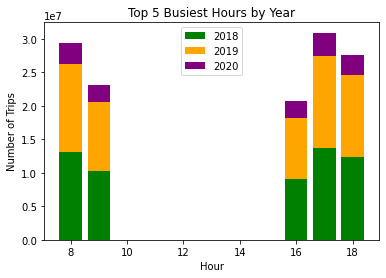

In [1]:
#Comparison of top busiest hour in 2018, 2019 and 2020:

import pymongo
import matplotlib.pyplot as plt

# Connect to MongoDB and select the database and collection
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["ridership"]
col_2018 = db["2018"]
col_2019 = db["2019"]
col_2020 = db["2020"]

# Aggregate data to find top busiest hours for each year
cursor_2018 = col_2018.aggregate([
  {
    "$group": {
      "_id": "$Hour",
      "totalTrips": { "$sum": "$Trip Count" }
    }
  },
  {
    "$sort": { "totalTrips": -1 }
  },
  {
    "$limit": 5
  }
])

cursor_2019 = col_2019.aggregate([
  {
    "$group": {
      "_id": "$Hour",
      "totalTrips": { "$sum": "$Trip Count" }
    }
  },
  {
    "$sort": { "totalTrips": -1 }
  },
  {
    "$limit": 5
  }
])

cursor_2020 = col_2020.aggregate([
  {
    "$group": {
      "_id": "$Hour",
      "totalTrips": { "$sum": "$Trip Count" }
    }
  },
  {
    "$sort": { "totalTrips": -1 }
  },
  {
    "$limit": 5
  }
])

# Create empty lists for storing data
hours = []
trips_2018 = []
trips_2019 = []
trips_2020 = []

# Iterate through cursor and append data to lists for each year
for doc in cursor_2018:
    hours.append(doc['_id'])
    trips_2018.append(doc['totalTrips'])

for doc in cursor_2019:
    trips_2019.append(doc['totalTrips'])

for doc in cursor_2020:
    trips_2020.append(doc['totalTrips'])

# Create stacked bar chart
plt.bar(hours, trips_2018, color='green', label='2018')
plt.bar(hours, trips_2019, bottom=trips_2018, color='orange', label='2019')
plt.bar(hours, trips_2020, bottom=[sum(x) for x in zip(trips_2018, trips_2019)], color='purple', label='2020')

# Add axis labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Top 5 Busiest Hours by Year')

# Add legend
plt.legend(loc='upper center')

# Display plot
plt.show()
